In [256]:
import numpy as np
import cv2 as cv
import glob


# Load previously saved data
with np.load('CameraParams.npz') as file:
    mtx, dist, rvecs, tvecs = [file[i] for i in ('cameraMatrix','dist','rvecs','tvecs')]


def draw(img, corners, imgpts):

    corner = tuple(corners[0].ravel().astype('int32'))
    img = cv.line(img, corner, tuple(imgpts[0].ravel().astype('int32')), (255,0,0), 5)
    img = cv.line(img, corner, tuple(imgpts[1].ravel().astype('int32')), (0,255,0), 5)
    img = cv.line(img, corner, tuple(imgpts[2].ravel().astype('int32')), (0,0,255), 5)

    return img

In [262]:


objp = np.zeros((10*7,3), np.float32)
objp[:,:2] = np.mgrid[0:10,0:7].T.reshape(-1,2)

objp = objp[[0, 9, 60, 69]]

print(objp)

img = cv.imread('images/t.jpg')
img = cv.resize(img, (640, 480))

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (10,7),None)

corners = corners[[0, 9, 60, 69]]

print(corners)

if ret == True:
    # Find the rotation and translation vectors.
    ret, rvecs, tvecs = cv.solvePnP(objp, corners, mtx, dist)

    axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
    # Project 3D points to image plane
    imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
    
    img = draw(img,corners,imgpts)
    cv.imshow('img',img)
    cv.waitKey(0)


cv.destroyAllWindows()

[[0. 0. 0.]
 [9. 0. 0.]
 [0. 6. 0.]
 [9. 6. 0.]]
[[[487.34338 259.46786]]

 [[194.92494 342.78308]]

 [[389.46252 186.41982]]

 [[162.71509 235.30836]]]


In [239]:
test_image = cv.imread('images/t.jpg')

gray = cv.cvtColor(test_image,cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (10,7),None)

corners = corners[[0, 9, 60, 69]]

# Малювання кожної точки на зображенні
for corner in corners:
    x, y = corner[0]
    cv.circle(test_image, (int(x), int(y)), 4, (0, 255, 0), -1)  # Червоний колір, радіус 5

cv.imshow('img',test_image)
cv.waitKey(0)

-1

[[0. 0. 0.]
 [9. 0. 0.]
 [0. 6. 0.]
 [9. 6. 0.]]


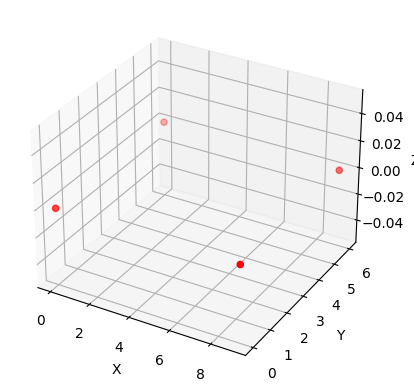

In [237]:
import numpy as np
import matplotlib.pyplot as plt

# Створення об'єкту objp
objp = np.zeros((10*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:10, 0:7].T.reshape(-1, 2)

objp = objp[[0, 9, 60, 69]]

# Розділення координат
x, y, z = objp[:, 0], objp[:, 1], objp[:, 2]

# Намалювати точки
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

# Настроїти вісі
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

print(objp)

# Показати графік
plt.show()


In [ ]:
corners = np.array([[[ 158.28883,  625.8848 ]], [[ 225.7558,  1033.2429 ]], [[ 881.3831,   825.3929 ]], [[ 597.7592,   528.88696]]])

objp = np.array([[0.0, 0.0, 0.0], [0.0, 1.0, 0], [1.0, 0.0, 0.0], [1.0, 1.0, 0]])

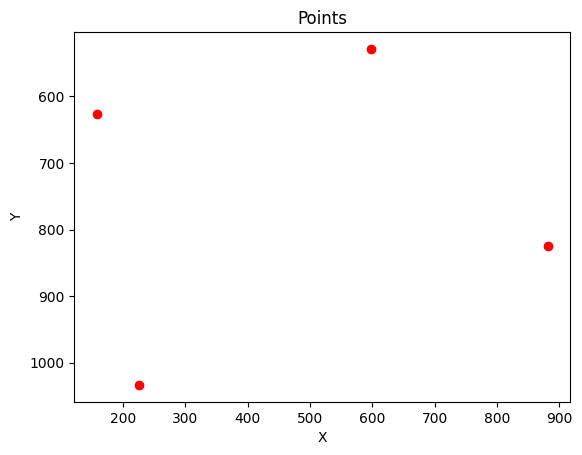

In [222]:
import numpy as np
import matplotlib.pyplot as plt

# Ваші координати точок
corners = np.array([[[ 158.28883,  625.8848 ]], 
                    [[ 225.7558,  1033.2429 ]], 
                    [[ 881.3831,   825.3929 ]], 
                    [[ 597.7592,   528.88696]]])

# Розділення координат для зручності
x = corners[:, 0, 0]
y = corners[:, 0, 1]

# Намалювати точки
plt.scatter(x, y, color='r', marker='o')

# Настроїти вісі
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points')

# Відобразити вісь y у зворотньому напрямку
plt.gca().invert_yaxis()

# Показати графік
plt.show()
